In [3]:
from keras.applications import MobileNet
from keras.models import Sequential,Model 
from keras.layers import Dense,Dropout,Activation,Flatten,GlobalAveragePooling2D
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras.layers.normalization import BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator
# MobileNet is designed to work with images of dim 224,224
img_rows,img_cols = 224,224
import pandas as ps
import numpy as np
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import cv2
import  pickle
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

In [101]:
top_model =load_model('data_utiliser/model-top.h5')


In [102]:
top_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)       

In [4]:
from tensorflow.keras import layers
last_layer=top_model.get_layer('activation_21')
last_layer

NameError: name 'top_model' is not defined

In [104]:
last_output = last_layer.output
last_output



<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'activation_21')>

In [105]:
final_output=BatchNormalization()(last_output)

In [106]:
final_output=layers.Dense(7,name="dens_8")(final_output)

final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dens_8')>

In [107]:
final_output=layers.Activation('relu')(final_output)
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'activation_2')>

In [108]:
new_model = Model(inputs=top_model.input, outputs=final_output) 


In [109]:
new_model.summary() 


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8_input (InputLayer)  [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128 

In [110]:
train_data_dir = 'C:/Users/Anouar Gmili/Desktop/images_fer2013/Training2'
validation_data_dir = 'C:/Users/Anouar Gmili/Desktop/images_fer2013/validation'
img_rows,img_cols = 48,48

In [111]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    width_shift_range=0.3,
                    height_shift_range=0.3,
                    horizontal_flip=True,
                    fill_mode='nearest'
                                   )

validation_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size = (img_rows,img_cols),
                        batch_size = batch_size,
    color_mode = "grayscale",
                        class_mode = 'categorical'
                        )

validation_generator = validation_datagen.flow_from_directory(
                            validation_data_dir,
                            target_size=(img_rows,img_cols),
                            batch_size=batch_size,
color_mode = "grayscale",
                            class_mode='categorical')


Found 2861 images belonging to 7 classes.
Found 412 images belonging to 7 classes.


In [5]:

from keras.optimizers import RMSprop,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau


In [113]:

checkpoint = ModelCheckpoint(
                        'top_tap_tip3.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(
                          monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=5,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.0001)


In [114]:

callbacks = [earlystop,checkpoint,learning_rate_reduction]

new_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy']
              )

nb_train_samples = 2861    
nb_validation_samples = 412 
epochs = 25


In [115]:
 history = new_model.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples//batch_size,
            epochs=epochs,
            callbacks=callbacks,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples//batch_size)


Epoch 1/25
89/89 [==============================] - 114s 1s/step - loss: 9.7526 - accuracy: 0.0881 - val_loss: 8.6309 - val_accuracy: 0.2552

Epoch 00001: val_loss improved from inf to 8.63093, saving model to top_tap_tip3.h5
Epoch 2/25
89/89 [==============================] - 89s 995ms/step - loss: 8.6903 - accuracy: 0.1352 - val_loss: 7.6474 - val_accuracy: 0.0651

Epoch 00002: val_loss improved from 8.63093 to 7.64745, saving model to top_tap_tip3.h5
Epoch 3/25
89/89 [==============================] - 87s 978ms/step - loss: 8.0354 - accuracy: 0.1702 - val_loss: 6.7564 - val_accuracy: 0.0781

Epoch 00003: val_loss improved from 7.64745 to 6.75637, saving model to top_tap_tip3.h5
Epoch 4/25
89/89 [==============================] - 85s 953ms/step - loss: 7.7278 - accuracy: 0.1741 - val_loss: 7.0074 - val_accuracy: 0.0964

Epoch 00004: val_loss did not improve from 6.75637
Epoch 5/25
89/89 [==============================] - 89s 1s/step - loss: 7.3348 - accuracy: 0.1894 - val_loss: 8.825

#### classifier =load_model('top_tap_tip .h5')


In [71]:
new_model.save("tata.h5")

# test de my model


In [116]:
class_labels = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
class_labels2 = ['Angry','Happy','Neutral','Sad','Surprise']

In [117]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('haarcascade_eye.xml')
img_rows,img_cols = 224,224
#MobileNet = MobileNet(weights='imagenet',include_top=False,input_shape=(img_rows,img_cols,3))
recognizer =cv2.face.LBPHFaceRecognizer_create()
labels2 ={"personne_name":1}
face_classifier = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
import matplotlib.pyplot as plt

(1, 48, 48, 1)

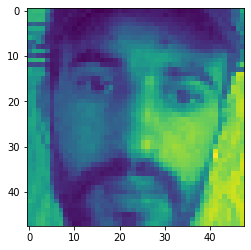

In [212]:
# Grab a single frame of video

frame=cv2.imread('neutral_anouar.jpg')
labels = []
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(gray,1.3,5)
for (x,y,w,h) in faces:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
    plt.imshow(roi_gray)
    if np.sum([roi_gray])!=0:
        roi = roi_gray.astype('float')/255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi,axis=0)
        #name = labels2[id_]
roi.shape

In [213]:
preds=top_model203.predict(roi)


In [214]:
preds



array([[0.01786578, 0.00085462, 0.08285689, 0.03753978, 0.7274476 ,
        0.12408388, 0.00935148]], dtype=float32)

In [215]:
label=class_labels[preds.argmax()]
print("\nprediction max = ",preds.argmax())
print("\nlabel = ",label)


prediction max =  4

label =  Neutral


# 3ieme chance 

In [6]:
import pandas as ps
import numpy as np
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt


In [133]:
img_array=cv2.imread("data_trainig_small0-1/0/1.jpg")
Dtatdirectory="data_trainig_small0-1"
Classes=["0","1","2","3","4","5","6"]

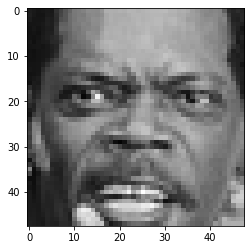

In [134]:
for category in Classes:
    path=os.path.join(Dtatdirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

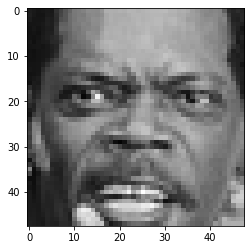

In [145]:

img_size=48
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [146]:
new_array.shape


(48, 48, 3)

In [147]:
training_Data=[]
def creat_training_data():
    for category in Classes:
        path = os.path.join(Dtatdirectory, category)
        clas_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                new_array= cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
                training_Data.append([new_array,clas_num])
            except Exception as e:
                pass

In [148]:
creat_training_data()

In [149]:

print(len(training_Data))

831


In [153]:

import random
random.shuffle(training_Data)
X=[]
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
x=np.array(X).reshape(-1,img_size,img_size,1)
x.shape

(831, 48, 48, 1)

In [154]:
x=x/255.0

In [155]:
x

array([[[[0.84705882],
         [0.84313725],
         [0.84313725],
         ...,
         [0.7372549 ],
         [0.72156863],
         [0.69803922]],

        [[0.84705882],
         [0.85098039],
         [0.85490196],
         ...,
         [0.73333333],
         [0.7254902 ],
         [0.70588235]],

        [[0.85098039],
         [0.85098039],
         [0.8627451 ],
         ...,
         [0.7372549 ],
         [0.72156863],
         [0.70588235]],

        ...,

        [[0.85098039],
         [0.82352941],
         [0.8       ],
         ...,
         [0.75294118],
         [0.94901961],
         [0.76470588]],

        [[0.83921569],
         [0.81176471],
         [0.8       ],
         ...,
         [0.90196078],
         [0.84705882],
         [0.41568627]],

        [[0.82352941],
         [0.80392157],
         [0.8       ],
         ...,
         [0.90980392],
         [0.53333333],
         [0.21176471]]],


       [[[0.10980392],
         [0.1254902 ],
         [0.15

In [156]:
y[6]

4

In [157]:
import tensorflow as tf
from  tensorflow import keras
from tensorflow.keras import layers

In [171]:
top_model =load_model('data_utiliser/model-top.h5')
top_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)       

In [172]:
base_input=top_model.layers[0].input
base_output=top_model.layers[-1].output

In [173]:
base_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'activation_21')>

In [174]:
base_input

<KerasTensor: shape=(None, 48, 48, 1) dtype=float32 (created by layer 'conv2d_8_input')>

In [175]:

final_output=layers.Dense(7)(base_output)
final_ouput=layers.Activation('relu')(final_output)
final_output=layers.Dense(7)(final_ouput)
final_ouput=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_ouput)

In [176]:
final_output


<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_8')>

In [177]:

new_model=keras.Model(inputs=base_input,outputs=final_output)
new_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8_input (InputLayer)  [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128 

In [178]:

new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [179]:
x_t=np.array(x)
y_t=np.array(y)

In [180]:
new_model.fit(x_t,y_t,epochs=5)

Epoch 1/5
26/26 [==============================] - 30s 882ms/step - loss: 1.9344 - accuracy: 0.1618
Epoch 2/5
26/26 [==============================] - 28s 1s/step - loss: 1.8925 - accuracy: 0.2614
Epoch 3/5
26/26 [==============================] - 27s 1s/step - loss: 1.8662 - accuracy: 0.2568
Epoch 4/5
26/26 [==============================] - 28s 1s/step - loss: 1.8204 - accuracy: 0.2622
Epoch 5/5
26/26 [==============================] - 33s 1s/step - loss: 1.7747 - accuracy: 0.2729


In [181]:
top_model23=load_model('data_utiliser/model-top.h5')
top_model23.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)       

In [188]:
import tensorflow
y_train = tensorflow.keras.utils.to_categorical(y_t, 7)


In [200]:
top_model23.fit(x_t,y_train,epochs=20)

Epoch 1/20
26/26 [==============================] - 45s 2s/step - loss: 0.9105 - accuracy: 0.6775
Epoch 2/20
26/26 [==============================] - 41s 2s/step - loss: 0.8308 - accuracy: 0.6895
Epoch 3/20
26/26 [==============================] - 40s 2s/step - loss: 0.7773 - accuracy: 0.7148
Epoch 4/20
26/26 [==============================] - 36s 1s/step - loss: 0.7489 - accuracy: 0.7304
Epoch 5/20
26/26 [==============================] - 36s 1s/step - loss: 0.6336 - accuracy: 0.7762
Epoch 6/20
26/26 [==============================] - 37s 1s/step - loss: 0.5597 - accuracy: 0.8207
Epoch 7/20
26/26 [==============================] - 36s 1s/step - loss: 0.5400 - accuracy: 0.8171
Epoch 8/20
26/26 [==============================] - 36s 1s/step - loss: 0.4943 - accuracy: 0.8375
Epoch 9/20
26/26 [==============================] - 36s 1s/step - loss: 0.4811 - accuracy: 0.8400
Epoch 10/20
26/26 [==============================] - 32s 1s/step - loss: 0.4380 - accuracy: 0.8424
Epoch 11/20
26/26 [

In [201]:
top_model23.save("yarb2i.h5")

In [202]:
top_model203=load_model('yarb2i.h5')


In [199]:
top_model203.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)       

# training model sur my face 

In [282]:
img_array=cv2.imread("data_trainig_small0-1/0/1.jpg")
Dtatdirectory="my_face_base_grand"
Classes=["0","1","2","3","4","5","6"]

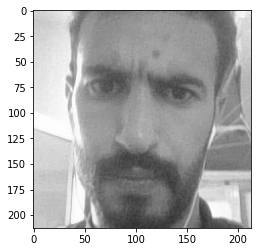

In [283]:
for category in Classes:
    path=os.path.join(Dtatdirectory,category)
    path
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

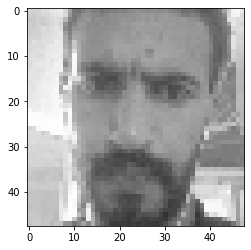

In [288]:

img_size=48
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [289]:
new_array.shape


(48, 48, 3)

In [9]:
training_Data=[]
def creat_training_data():
    for category in Classes:
        path = os.path.join(Dtatdirectory, category)
        clas_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                new_array= cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
                training_Data.append([new_array,clas_num])
            except Exception as e:
                pass

In [291]:
creat_training_data()

In [292]:

print(len(training_Data))

371


In [293]:

import random
random.shuffle(training_Data)
X=[]
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
x=np.array(X).reshape(-1,img_size,img_size,1)
x.shape

(371, 48, 48, 1)

In [294]:
x=x/255.0

In [246]:
top_model =load_model('data_utiliser/model-top.h5')


In [295]:
x_t=np.array(x)
y_t=np.array(y)

In [249]:
new_model.fit(x_t,y_t,epochs=5)

Epoch 1/5
12/12 [==============================] - 17s 1s/step - loss: 1.2441 - accuracy: 0.3450
Epoch 2/5
12/12 [==============================] - 17s 1s/step - loss: 1.2298 - accuracy: 0.4097
Epoch 3/5
12/12 [==============================] - 16s 1s/step - loss: 1.1907 - accuracy: 0.5445
Epoch 4/5
12/12 [==============================] - 17s 1s/step - loss: 1.1872 - accuracy: 0.5418
Epoch 5/5
12/12 [==============================] - 17s 1s/step - loss: 1.1653 - accuracy: 0.5472


In [250]:
new_model.save("myface_datagrand.h5")

# la doubke transfer 

In [251]:
img_array=cv2.imread("data_trainig_small0-1/0/1.jpg")
Dtatdirectory="C:/Users/Anouar Gmili/Desktop/images_fer2013/Training2_01"
Classes=["0","1","2","3","4","5","6"]

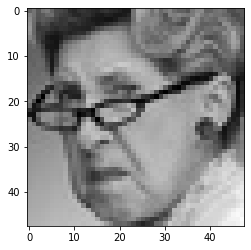

In [252]:
for category in Classes:
    path=os.path.join(Dtatdirectory,category)
    path
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

In [253]:
creat_training_data()

In [254]:

print(len(training_Data))

1211


In [258]:
new_model_partie1 =load_model('data_utiliser/model-top.h5')


In [259]:

import random
random.shuffle(training_Data)
X=[]
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
x=np.array(X).reshape(-1,img_size,img_size,1)
x.shape

(1211, 48, 48, 1)

In [260]:
x=x/255.0

In [262]:
x_t=np.array(x)
y_t=np.array(y)

In [264]:
import tensorflow
y_train = tensorflow.keras.utils.to_categorical(y_t, 7)


In [266]:
new_model_partie1.fit(x_t,y_train,epochs=20)

Epoch 1/20
38/38 [==============================] - 68s 2s/step - loss: 1.3287 - accuracy: 0.5062
Epoch 2/20
38/38 [==============================] - 65s 2s/step - loss: 1.1291 - accuracy: 0.5879
Epoch 3/20
38/38 [==============================] - 60s 2s/step - loss: 1.0415 - accuracy: 0.6069
Epoch 4/20
38/38 [==============================] - 58s 2s/step - loss: 0.9594 - accuracy: 0.6408
Epoch 5/20
38/38 [==============================] - 56s 1s/step - loss: 0.8106 - accuracy: 0.7143
Epoch 6/20
38/38 [==============================] - 55s 1s/step - loss: 0.7382 - accuracy: 0.7291
Epoch 7/20
38/38 [==============================] - 56s 1s/step - loss: 0.6665 - accuracy: 0.7622
Epoch 8/20
38/38 [==============================] - 56s 1s/step - loss: 0.5839 - accuracy: 0.7952
Epoch 9/20
38/38 [==============================] - 55s 1s/step - loss: 0.5177 - accuracy: 0.8200
Epoch 10/20
38/38 [==============================] - 49s 1s/step - loss: 0.4756 - accuracy: 0.8357
Epoch 11/20
38/38 [

In [267]:
new_model_partie1.save("model_partie1.h5")

# la aprtie deux

In [270]:
img_array=cv2.imread("data_trainig_small0-1/0/1.jpg")
Dtatdirectory="C:/Users/Anouar Gmili/Desktop/images_fer2013/Training2-01v2"
Classes=["0","1","2","3","4","5","6"]

In [271]:
creat_training_data()

In [272]:

print(len(training_Data))

2038


In [273]:

import random
random.shuffle(training_Data)
X=[]
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
x=np.array(X).reshape(-1,img_size,img_size,1)
x.shape

(2038, 48, 48, 1)

In [274]:
#x=x/255.0

In [275]:
x_t=np.array(x)
y_t=np.array(y)

In [276]:
import tensorflow
y_train = tensorflow.keras.utils.to_categorical(y_t, 7)


In [279]:
new_model_partie2=load_model("model_partie1.h5")

In [280]:
new_model_partie2.fit(x_t,y_train,epochs=20)

Epoch 1/20
64/64 [==============================] - 95s 1s/step - loss: 1.0217 - accuracy: 0.7159
Epoch 2/20
64/64 [==============================] - 90s 1s/step - loss: 0.6756 - accuracy: 0.7728
Epoch 3/20
64/64 [==============================] - 96s 2s/step - loss: 0.5367 - accuracy: 0.8263
Epoch 4/20
64/64 [==============================] - 93s 1s/step - loss: 0.4078 - accuracy: 0.8636
Epoch 5/20
64/64 [==============================] - 93s 1s/step - loss: 0.3742 - accuracy: 0.8798
Epoch 6/20
64/64 [==============================] - 96s 1s/step - loss: 0.3060 - accuracy: 0.9014
Epoch 7/20
64/64 [==============================] - 99s 2s/step - loss: 0.3084 - accuracy: 0.8955
Epoch 8/20
64/64 [==============================] - 101s 2s/step - loss: 0.2258 - accuracy: 0.9328
Epoch 9/20
64/64 [==============================] - 95s 1s/step - loss: 0.2092 - accuracy: 0.9416
Epoch 10/20
64/64 [==============================] - 108s 2s/step - loss: 0.1950 - accuracy: 0.9392
Epoch 11/20
64/64

In [281]:
new_model_partie2.save("model_partie2_final.h5")

# la partie 3 avec ma propre data


In [316]:
img_array=cv2.imread("data_trainig_small0-1/0/1.jpg")
Dtatdirectory="my_face_base_grand"
Classes=["0","1","2","3","4","5","6"]
training_Data=[]

In [317]:
creat_training_data()

In [324]:

import random
random.shuffle(training_Data)
X=[]
y=None
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
x=np.array(X).reshape(-1,img_size,img_size,1)
x.shape

(371, 48, 48, 1)

In [325]:
#x=x/255.0


In [329]:
len(y)

371

In [331]:
x_t=np.array(x)
y_t=np.array(y)

In [332]:
import tensorflow
y_train = tensorflow.keras.utils.to_categorical(y_t, 7)


In [333]:
new_model_partie3_final2=load_model("model_partie2_final.h5")

In [334]:
#new_model_partie3_final2.fit(x_t,y_train,epochs=20)

Epoch 1/20
12/12 [==============================] - 32s 1s/step - loss: 0.0797 - accuracy: 0.9784
Epoch 2/20
12/12 [==============================] - 17s 1s/step - loss: 0.0440 - accuracy: 0.9811
Epoch 3/20
12/12 [==============================] - 17s 1s/step - loss: 0.0304 - accuracy: 0.9946
Epoch 4/20
12/12 [==============================] - 17s 1s/step - loss: 0.0184 - accuracy: 1.0000
Epoch 5/20
12/12 [==============================] - 16s 1s/step - loss: 0.0189 - accuracy: 0.9973
Epoch 6/20
12/12 [==============================] - 17s 1s/step - loss: 0.0162 - accuracy: 1.0000
Epoch 7/20
12/12 [==============================] - 18s 2s/step - loss: 0.0157 - accuracy: 1.0000
Epoch 8/20
12/12 [==============================] - 18s 2s/step - loss: 0.0111 - accuracy: 1.0000
Epoch 9/20
12/12 [==============================] - 18s 1s/step - loss: 0.0250 - accuracy: 0.9946
Epoch 10/20
12/12 [==============================] - 17s 1s/step - loss: 0.0129 - accuracy: 1.0000
Epoch 11/20
12/12 [

In [336]:
new_model_partie3_final2.save("model_partie3_final2.h5")

# AVEC DATA MAROC sur top model direct

In [13]:
img_array=cv2.imread("data_trainig_small0-1/0/1.jpg")
Dtatdirectory="C:/Users/Anouar Gmili/Desktop/data_maroc0_1"
Classes=["0","1","2","3","4","5","6"]
training_Data=[]

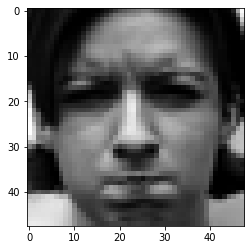

In [14]:
for category in Classes:
    path=os.path.join(Dtatdirectory,category)
    path
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

In [15]:
creat_training_data()

In [16]:

print(len(training_Data))

476


In [17]:

img_size=48


In [18]:

import random
random.shuffle(training_Data)
X=[]
y=None
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
x=np.array(X).reshape(-1,img_size,img_size,1)
x.shape

(476, 48, 48, 1)

In [19]:
x=x/255.0

In [20]:
x_t=np.array(x)
y_t=np.array(y)

In [21]:
new_model_partie1 =load_model('data_utiliser/model-top.h5')


In [22]:
import tensorflow
y_t = tensorflow.keras.utils.to_categorical(y_t, 7)


In [23]:
new_model_partie1.fit(x_t,y_t,epochs=10)

Epoch 1/10
15/15 [==============================] - 15s 903ms/step - loss: 1.5241 - accuracy: 0.4643
Epoch 2/10
15/15 [==============================] - 13s 888ms/step - loss: 1.2435 - accuracy: 0.5315
Epoch 3/10
15/15 [==============================] - 13s 883ms/step - loss: 1.0282 - accuracy: 0.6218
Epoch 4/10
15/15 [==============================] - 14s 923ms/step - loss: 0.8656 - accuracy: 0.7143
Epoch 5/10
15/15 [==============================] - 14s 920ms/step - loss: 0.7732 - accuracy: 0.7353
Epoch 6/10
15/15 [==============================] - 14s 926ms/step - loss: 0.6767 - accuracy: 0.7857
Epoch 7/10
15/15 [==============================] - 14s 921ms/step - loss: 0.6020 - accuracy: 0.8235
Epoch 8/10
15/15 [==============================] - 14s 925ms/step - loss: 0.5600 - accuracy: 0.8235
Epoch 9/10
15/15 [==============================] - 14s 929ms/step - loss: 0.5097 - accuracy: 0.8466
Epoch 10/10
15/15 [==============================] - 14s 922ms/step - loss: 0.4548 - accura

In [24]:
new_model_partie1.save("top_model+data_maroc_remarque2.h5")

# data_ maroc +partie1

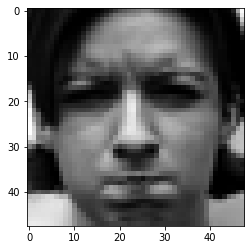

476


In [43]:
img_array=cv2.imread("data_trainig_small0-1/0/1.jpg")
Dtatdirectory="C:/Users/Anouar Gmili/Desktop/data_maroc0_1"
Classes=["0","1","2","3","4","5","6"]
training_Data=[]

for category in Classes:
    path=os.path.join(Dtatdirectory,category)
    path
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

creat_training_data()
print(len(training_Data))
img_size=48
import random
random.shuffle(training_Data)
X=[]
y=None
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
x=np.array(X).reshape(-1,img_size,img_size,1)
x.shape
x=x/255.0
x_t=np.array(x)
y_t=np.array(y)
new_model =load_model('model_partie1.h5')

import tensorflow
y_t = tensorflow.keras.utils.to_categorical(y_t, 7)


In [45]:
new_model.fit(x_t,y_t,epochs=5)

Epoch 1/5
15/15 [==============================] - 11s 755ms/step - loss: 0.9158 - accuracy: 0.7311
Epoch 2/5
15/15 [==============================] - 12s 776ms/step - loss: 0.4599 - accuracy: 0.8571
Epoch 3/5
15/15 [==============================] - 12s 796ms/step - loss: 0.3023 - accuracy: 0.9055
Epoch 4/5
15/15 [==============================] - 14s 919ms/step - loss: 0.2552 - accuracy: 0.9307
Epoch 5/5
15/15 [==============================] - 13s 844ms/step - loss: 0.1788 - accuracy: 0.9517


In [46]:
new_model.save("partie1+data_maroc2.h5")

# model_mobilenet_test_avec_7class_pycharm# model_mobilenet_test_avec_7class_pycharm

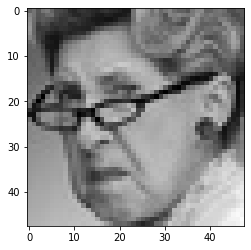

840
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)   

In [58]:
img_array=cv2.imread("data_trainig_small0-1/0/1.jpg")
Dtatdirectory="C:/Users/Anouar Gmili/Desktop/images_fer2013/Training2_01"
Classes=["0","1","2","3","4","5","6"]
training_Data=[]

for category in Classes:
    path=os.path.join(Dtatdirectory,category)
    path
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

creat_training_data()
print(len(training_Data))
img_size=48
import random
random.shuffle(training_Data)
X=[]
y=None
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
x=np.array(X).reshape(-1,48,48,1)
x.shape
x=x/255.0
x_t=np.array(x)
y_t=np.array(y)
new_model =load_model('data_utiliser/model-top.h5')
new_model.summary()
import tensorflow
y_t = tensorflow.keras.utils.to_categorical(y_t, 7)


In [59]:

import tensorflow as tf
from  tensorflow import keras
from tensorflow.keras import layers
base_input=new_model.layers[0].input
base_output=new_model.layers[-1].output

base_output

base_input


final_output=layers.Dense(7)(base_output)
final_ouput=layers.Activation('relu')(final_output)
final_output=layers.Dense(7)(final_ouput)
final_ouput=layers.Activation('relu')(final_output)
final_output=layers.Dense(7,activation='softmax')(final_ouput)

final_output


new_model3=keras.Model(inputs=base_input,outputs=final_output)
new_model3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8_input (InputLayer)  [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128 

In [63]:
new_model3.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy']
              )
new_model3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8_input (InputLayer)  [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128 

In [64]:
new_model3.fit(x_t,y_t,epochs=5)

Epoch 1/5
27/27 [==============================] - 24s 791ms/step - loss: 1.7184 - accuracy: 0.2896
Epoch 2/5
27/27 [==============================] - 20s 746ms/step - loss: 1.6639 - accuracy: 0.2827
Epoch 3/5
27/27 [==============================] - 22s 797ms/step - loss: 1.6223 - accuracy: 0.3125
Epoch 4/5
27/27 [==============================] - 22s 801ms/step - loss: 1.5482 - accuracy: 0.4110
Epoch 5/5
27/27 [==============================] - 21s 774ms/step - loss: 1.5309 - accuracy: 0.4245


# data maroc+fer+model-top

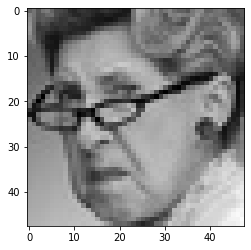

1397
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)  

In [25]:
img_array=cv2.imread("data_trainig_small0-1/0/1.jpg")
Dtatdirectory="C:/Users/Anouar Gmili/Desktop/data_maroc0_1+fer13"
Classes=["0","1","2","3","4","5","6"]
training_Data=[]

for category in Classes:
    path=os.path.join(Dtatdirectory,category)
    path
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

creat_training_data()
print(len(training_Data))
img_size=48
import random
random.shuffle(training_Data)
X=[]
y=None
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
x=np.array(X).reshape(-1,48,48,1)
x.shape
x=x/255.0
x_t=np.array(x)
y_t=np.array(y)
new_model =load_model('data_utiliser/model-top.h5')
new_model.summary()
import tensorflow
y_t = tensorflow.keras.utils.to_categorical(y_t, 7)


In [26]:
new_model.fit(x_t,y_t,epochs=10)

Epoch 1/10
44/44 [==============================] - 40s 843ms/step - loss: 1.4393 - accuracy: 0.4581
Epoch 2/10
44/44 [==============================] - 38s 869ms/step - loss: 1.2117 - accuracy: 0.5383
Epoch 3/10
44/44 [==============================] - 44s 1s/step - loss: 1.0789 - accuracy: 0.5870
Epoch 4/10
44/44 [==============================] - 44s 995ms/step - loss: 0.9668 - accuracy: 0.6442
Epoch 5/10
44/44 [==============================] - 40s 906ms/step - loss: 0.8749 - accuracy: 0.6793
Epoch 6/10
44/44 [==============================] - 40s 903ms/step - loss: 0.8152 - accuracy: 0.6943
Epoch 7/10
44/44 [==============================] - 39s 896ms/step - loss: 0.6973 - accuracy: 0.7559
Epoch 8/10
44/44 [==============================] - 41s 932ms/step - loss: 0.6161 - accuracy: 0.7860
Epoch 9/10
44/44 [==============================] - 40s 900ms/step - loss: 0.5590 - accuracy: 0.8103
Epoch 10/10
44/44 [==============================] - 40s 909ms/step - loss: 0.4911 - accuracy:

In [27]:
new_model.save("7jun.h5")

# data maroc+fer13+partie1

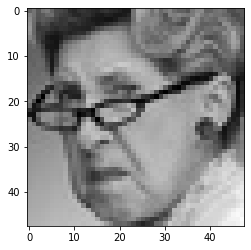

1397
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)  

In [28]:
img_array=cv2.imread("data_trainig_small0-1/0/1.jpg")
Dtatdirectory="C:/Users/Anouar Gmili/Desktop/data_maroc0_1+fer13"
Classes=["0","1","2","3","4","5","6"]
training_Data=[]

for category in Classes:
    path=os.path.join(Dtatdirectory,category)
    path
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

creat_training_data()
print(len(training_Data))
img_size=48
import random
random.shuffle(training_Data)
X=[]
y=None
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
x=np.array(X).reshape(-1,48,48,1)
x.shape
x=x/255.0
x_t=np.array(x)
y_t=np.array(y)
new_model =load_model('model_partie1.h5')
new_model.summary()
import tensorflow
y_t = tensorflow.keras.utils.to_categorical(y_t, 7)


In [30]:
new_model.fit(x_t,y_t,epochs=10)

Epoch 1/10
44/44 [==============================] - 43s 896ms/step - loss: 0.9034 - accuracy: 0.7523
Epoch 2/10
44/44 [==============================] - 39s 892ms/step - loss: 0.5325 - accuracy: 0.8289
Epoch 3/10
44/44 [==============================] - 42s 957ms/step - loss: 0.3351 - accuracy: 0.8991
Epoch 4/10
44/44 [==============================] - 41s 939ms/step - loss: 0.2586 - accuracy: 0.9191
Epoch 5/10
44/44 [==============================] - 47s 1s/step - loss: 0.2545 - accuracy: 0.9184
Epoch 6/10
44/44 [==============================] - 52s 1s/step - loss: 0.2162 - accuracy: 0.9291
Epoch 7/10
44/44 [==============================] - 57s 1s/step - loss: 0.1857 - accuracy: 0.9449
Epoch 8/10
44/44 [==============================] - 52s 1s/step - loss: 0.1567 - accuracy: 0.9542
Epoch 9/10
44/44 [==============================] - 42s 963ms/step - loss: 0.1487 - accuracy: 0.9585
Epoch 10/10
44/44 [==============================] - 41s 921ms/step - loss: 0.1535 - accuracy: 0.9535


In [31]:
new_model.save("7junZ.h5")


# data maroc +fer+partie2 final 

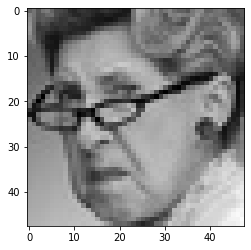

1397
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)  

In [32]:
img_array=cv2.imread("data_trainig_small0-1/0/1.jpg")
Dtatdirectory="C:/Users/Anouar Gmili/Desktop/data_maroc0_1+fer13"
Classes=["0","1","2","3","4","5","6"]
training_Data=[]

for category in Classes:
    path=os.path.join(Dtatdirectory,category)
    path
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

creat_training_data()
print(len(training_Data))
img_size=48
import random
random.shuffle(training_Data)
X=[]
y=None
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
x=np.array(X).reshape(-1,48,48,1)
x.shape
x=x/255.0
x_t=np.array(x)
y_t=np.array(y)
new_model =load_model('model_partie2_final_top.h5')
new_model.summary()
import tensorflow
y_t = tensorflow.keras.utils.to_categorical(y_t, 7)


In [33]:
new_model.fit(x_t,y_t,epochs=10)

Epoch 1/10
44/44 [==============================] - 49s 998ms/step - loss: 0.9043 - accuracy: 0.8046
Epoch 2/10
44/44 [==============================] - 55s 1s/step - loss: 0.4045 - accuracy: 0.8661
Epoch 3/10
44/44 [==============================] - 54s 1s/step - loss: 0.2476 - accuracy: 0.9220
Epoch 4/10
44/44 [==============================] - 41s 921ms/step - loss: 0.1850 - accuracy: 0.9449
Epoch 5/10
44/44 [==============================] - 41s 930ms/step - loss: 0.1451 - accuracy: 0.9571
Epoch 6/10
44/44 [==============================] - 42s 960ms/step - loss: 0.1337 - accuracy: 0.9599
Epoch 7/10
44/44 [==============================] - 44s 997ms/step - loss: 0.1245 - accuracy: 0.9585
Epoch 8/10
44/44 [==============================] - 40s 910ms/step - loss: 0.1230 - accuracy: 0.9671
Epoch 9/10
44/44 [==============================] - 42s 956ms/step - loss: 0.0956 - accuracy: 0.9728
Epoch 10/10
44/44 [==============================] - 40s 916ms/step - loss: 0.1066 - accuracy: 0.

In [34]:
new_model.save("7junZ2.h5")


# data maroc +fer+my model final

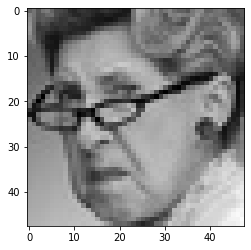

840
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)   

In [35]:
img_array=cv2.imread("data_trainig_small0-1/0/1.jpg")
Dtatdirectory="C:/Users/Anouar Gmili/Desktop/images_fer2013/Training2_01"
Classes=["0","1","2","3","4","5","6"]
training_Data=[]

for category in Classes:
    path=os.path.join(Dtatdirectory,category)
    path
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

creat_training_data()
print(len(training_Data))
img_size=48
import random
random.shuffle(training_Data)
X=[]
y=None
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
x=np.array(X).reshape(-1,48,48,1)
x.shape
x=x/255.0
x_t=np.array(x)
y_t=np.array(y)
new_model =load_model('7junZ2.h5')
new_model.summary()
import tensorflow
y_t = tensorflow.keras.utils.to_categorical(y_t, 7)


In [36]:
new_model.fit(x_t,y_t,epochs=10)

Epoch 1/10
27/27 [==============================] - 42s 1s/step - loss: 0.1056 - accuracy: 0.9714
Epoch 2/10
27/27 [==============================] - 27s 1s/step - loss: 0.0742 - accuracy: 0.9774
Epoch 3/10
27/27 [==============================] - 27s 1s/step - loss: 0.1285 - accuracy: 0.9631
Epoch 4/10
27/27 [==============================] - 29s 1s/step - loss: 0.1027 - accuracy: 0.9714
Epoch 5/10
27/27 [==============================] - 28s 1s/step - loss: 0.1408 - accuracy: 0.9607
Epoch 6/10
27/27 [==============================] - 29s 1s/step - loss: 0.1773 - accuracy: 0.9500
Epoch 7/10
27/27 [==============================] - 36s 1s/step - loss: 0.1086 - accuracy: 0.9690
Epoch 8/10
27/27 [==============================] - 30s 1s/step - loss: 0.0830 - accuracy: 0.9810
Epoch 9/10
27/27 [==============================] - 27s 986ms/step - loss: 0.0807 - accuracy: 0.9762
Epoch 10/10
27/27 [==============================] - 25s 933ms/step - loss: 0.0599 - accuracy: 0.9833


In [37]:
new_model.save("7junZ2_tkharbiq.h5")

# grand data melange °top model

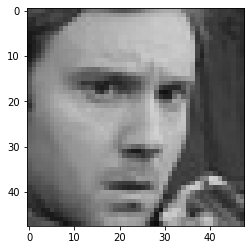

2526
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_11 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)  

In [40]:
img_array=cv2.imread("data_trainig_small0-1/0/1.jpg")
Dtatdirectory="C:/Users/Anouar Gmili/Desktop/images_fer2013/Training2_melange"
Classes=["0","1","2","3","4","5","6"]
training_Data=[]

for category in Classes:
    path=os.path.join(Dtatdirectory,category)
    path
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

creat_training_data()
print(len(training_Data))
img_size=48
import random
random.shuffle(training_Data)
X=[]
y=None
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
x=np.array(X).reshape(-1,48,48,1)
x.shape
x=x/255.0
x_t=np.array(x)
y_t=np.array(y)
new_model =load_model('model-top.h5')
new_model.summary()
import tensorflow
y_t = tensorflow.keras.utils.to_categorical(y_t, 7)


In [41]:
len(x)

2526

In [42]:
new_model.fit(x_t,y_t,epochs=10)

Epoch 1/10
79/79 [==============================] - 71s 870ms/step - loss: 1.4515 - accuracy: 0.4652
Epoch 2/10
79/79 [==============================] - 69s 878ms/step - loss: 1.2339 - accuracy: 0.5234
Epoch 3/10
79/79 [==============================] - 69s 876ms/step - loss: 1.1213 - accuracy: 0.5796
Epoch 4/10
79/79 [==============================] - 72s 906ms/step - loss: 1.0281 - accuracy: 0.6049
Epoch 5/10
79/79 [==============================] - 71s 897ms/step - loss: 0.9297 - accuracy: 0.6401
Epoch 6/10
79/79 [==============================] - 69s 879ms/step - loss: 0.8598 - accuracy: 0.6932
Epoch 7/10
79/79 [==============================] - 70s 879ms/step - loss: 0.7651 - accuracy: 0.7241
Epoch 8/10
79/79 [==============================] - 74s 934ms/step - loss: 0.6837 - accuracy: 0.7427
Epoch 9/10
79/79 [==============================] - 78s 994ms/step - loss: 0.6286 - accuracy: 0.7593
Epoch 10/10
79/79 [==============================] - 81s 1s/step - loss: 0.5849 - accuracy:

In [43]:
new_model.save("7junZ2_melenge.h5")

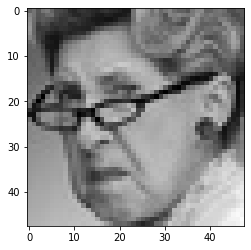

1397


In [45]:
img_array=cv2.imread("data_trainig_small0-1/0/1.jpg")
Dtatdirectory="C:/Users/Anouar Gmili/Desktop/data_maroc0_1+fer13"
Classes=["0","1","2","3","4","5","6"]
training_Data=[]

for category in Classes:
    path=os.path.join(Dtatdirectory,category)
    path
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

creat_training_data()
print(len(training_Data))
img_size=48
import random
random.shuffle(training_Data)
X=[]
y=None
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
x=np.array(X).reshape(-1,48,48,1)
x.shape
x=x/255.0
x_t=np.array(x)
y_t=np.array(y)
import tensorflow
y_t = tensorflow.keras.utils.to_categorical(y_t, 7)


In [46]:
new_model.fit(x_t,y_t,epochs=10)

Epoch 1/10
44/44 [==============================] - 46s 1s/step - loss: 0.6994 - accuracy: 0.7595
Epoch 2/10
44/44 [==============================] - 50s 1s/step - loss: 0.5578 - accuracy: 0.7917
Epoch 3/10
44/44 [==============================] - 41s 927ms/step - loss: 0.4328 - accuracy: 0.8611
Epoch 4/10
44/44 [==============================] - 40s 910ms/step - loss: 0.4032 - accuracy: 0.8747
Epoch 5/10
44/44 [==============================] - 42s 945ms/step - loss: 0.3769 - accuracy: 0.8769
Epoch 6/10
44/44 [==============================] - 41s 927ms/step - loss: 0.3204 - accuracy: 0.8976
Epoch 7/10
44/44 [==============================] - 43s 976ms/step - loss: 0.2730 - accuracy: 0.9148
Epoch 8/10
44/44 [==============================] - 40s 920ms/step - loss: 0.2755 - accuracy: 0.9205
Epoch 9/10
44/44 [==============================] - 42s 956ms/step - loss: 0.2179 - accuracy: 0.9327
Epoch 10/10
44/44 [==============================] - 44s 990ms/step - loss: 0.1986 - accuracy: 0.

In [47]:
new_model.save("7junZ2_melenge+datamaroc.h5")